# Cross-correlation

#Test nº 10

**Here we will repeat the test #9. However we will simulate both prisms with different magnetization directions. The first model has the same direction as the magnetic field. We will test the correlation for both positive and negative intervals for inclination and also by using the free and corrupted noised total field data.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from codes.prism import prism_tf
from codes.plot import draw_prism

In [2]:
n = 100 # points
x = np.linspace(-2000, 2000, n) # horizontal vectors
y = np.copy(x)
z = -100.
X, Y = np.meshgrid(x, y) # grid

In [49]:
model1 = [-500., -200., -500., -200., 200., 600., 0.962]
model2 = [200., 500., 200., 500., 200., 600., 0.796]
area1 = (model1[:4])
area2 = (model2[:4])

incf, decf = 30., -50.  # field
inc1, dec1 = 30., -50.  # source n° 1
inc2, dec2 = 60., 80. # source n° 1

In [50]:
tf1 = prism_tf(X, Y, z, model1, incf, decf, inc1, dec1) # total-field anomaly
tf2 = prism_tf(X, Y, z, model2, incf, decf, inc2, dec2) # total-field anomaly

In [51]:
# Total field anomaly due the both prisms
tf = tf1 + tf2

In [52]:
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [53]:
print 'Total field by the first model:'
_ = analysis(tf1, 'nT') # analyzing

Total field by the first model:
Minimum:    -22.9355 nT
Maximum:    24.9586 nT
Mean value: -0.0722 nT
Variation:  47.8940 nT


In [54]:
print 'Total field by the second model:'
_ = analysis(tf2, 'nT') # analyzing

Total field by the second model:
Minimum:    -7.2675 nT
Maximum:    33.9968 nT
Mean value: 0.2736 nT
Variation:  41.2643 nT


In [55]:
print 'Total field anomaly:'
_ = analysis(tf, 'nT') # analyzing

Total field anomaly:
Minimum:    -23.1488 nT
Maximum:    32.3314 nT
Mean value: 0.2014 nT
Variation:  55.4802 nT


In [56]:
# Including noise
tf1_noise = addnoise(tf1, 1.0, 0.1)
tf2_noise = addnoise(tf2, 1.0, 0.1)

In [57]:
# All data
tf_noisy = tf1_noise + tf2_noise

In [58]:
print 'First noised anomaly:'
_ = analysis(tf1_noise, 'nT') # analyzing

First noised anomaly:
Minimum:    -21.8504 nT
Maximum:    26.0775 nT
Mean value: 0.9287 nT
Variation:  47.9279 nT


In [59]:
print 'Second noised anomaly:'
_ = analysis(tf2_noise, 'nT') # analyzing

Second noised anomaly:
Minimum:    -6.2813 nT
Maximum:    34.9748 nT
Mean value: 1.2733 nT
Variation:  41.2561 nT


In [60]:
print 'Noised total field:'
_ = analysis(tf_noisy, 'nT') # analyzing

Noised total field:
Minimum:    -21.1339 nT
Maximum:    34.2942 nT
Mean value: 2.2020 nT
Variation:  55.4281 nT


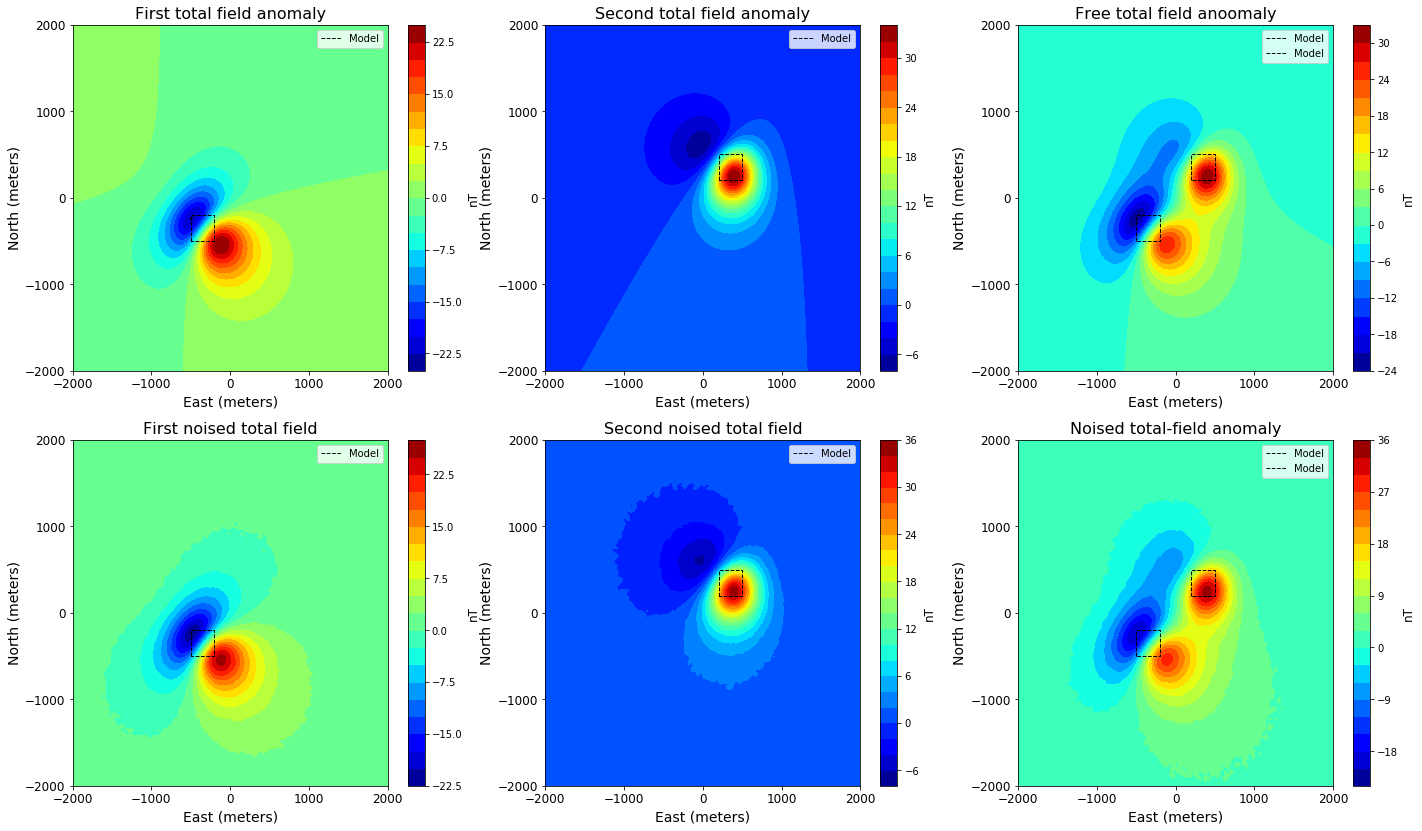

In [61]:
plt.close('all')
plt.figure(figsize=(24, 14))

plt.subplot(2, 3, 1)
plt.contourf(Y, X, tf1, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('First total field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 2)
plt.contourf(Y, X, tf2, 20, cmap = plt.cm.jet)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Second total field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 3)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Free total field anoomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 4)
plt.contourf(Y, X, tf1_noise, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('First noised total field', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 5)
plt.contourf(Y, X, tf2_noise, 20, cmap = plt.cm.jet)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Second noised total field', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 6)
plt.contourf(Y, X, tf_noisy, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Noised total-field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

#plt.savefig('test10-fig01-anomaly.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [62]:
from codes.statistical import cccoef # correlation coefficient

In [63]:
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

(A) Using the freeUsing a free total field anomaly

In [64]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values

Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [65]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [66]:
# Correlation for positive interval
for j in range(nd):
    for i in range(ni):    
        rtp_pos = reduction(x, y, tf, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

In [67]:
# Correlation for negative interval
for i in range(ni):
    for j in range(nd):
        rtp_neg = reduction(x, y, tf, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)

In [68]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.3281
Maximum:    0.7356
Mean value: 0.6267
Variation:  0.4075

Correlacao (inclinacao negativa)
Minimum:    -0.7356
Maximum:    -0.3281
Mean value: -0.6270
Variation:  0.4075


In [69]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 52.0
Declination: -40.0

Minima correlacao:
Inclination: 10.0
Declination: 61.0


In [70]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: -119.0

Minima correlacao:
Inclination: -52.0
Declination: 140.0


In [71]:
# True values
print 'True 1st pair:', '(', inc1, '/', dec1, ')'
print 'True 2nd pair:', '(', inc2, '/', dec2, ')'

True 1st pair: ( 30.0 / -50.0 )
True 2nd pair: ( 60.0 / 80.0 )


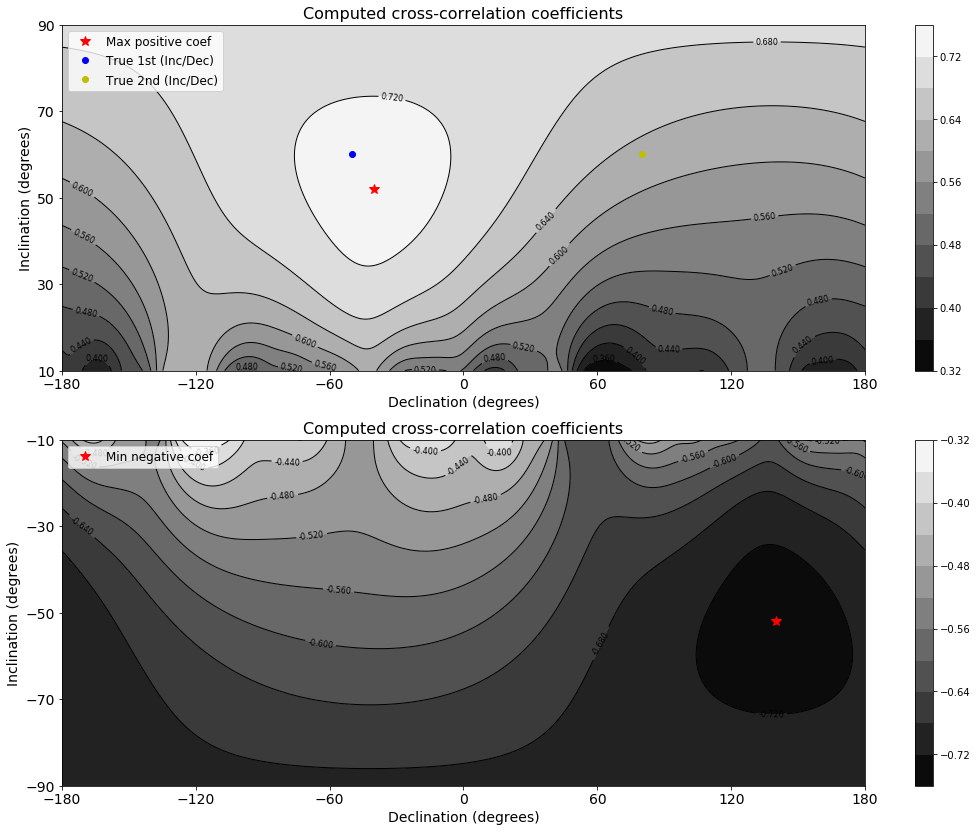

In [72]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.plot(dec1, inc2, 'bo', markersize = 6, label = 'True 1st (Inc/Dec)')
plt.plot(dec2, inc2, 'yo', markersize = 6, label = 'True 2nd (Inc/Dec)')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('test10-fig02-1st_correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(B) Using the noised total field anomaly

In [73]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [74]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [75]:
# Correlation for positive interval
for i in range(ni):   
    for j in range(nd):     
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

In [76]:
# Correlation for negative interval
for i in range(ni): 
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)  

In [77]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.2977
Maximum:    0.6652
Mean value: 0.5723
Variation:  0.3675

Correlacao (inclinacao negativa)
Minimum:    -0.6652
Maximum:    -0.2977
Mean value: -0.5725
Variation:  0.3675


In [78]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 59.0
Declination: -31.0

Minima correlacao:
Inclination: 10.0
Declination: 60.0


In [81]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: -120.0

Minima correlacao:
Inclination: -59.0
Declination: 149.0


In [82]:
# True values
print 'True 1st pair:', '(', inc1, '/', dec1, ')'
print 'True 2nd pair:', '(', inc2, '/', dec2, ')'

True 1st pair: ( 30.0 / -50.0 )
True 2nd pair: ( 60.0 / 80.0 )


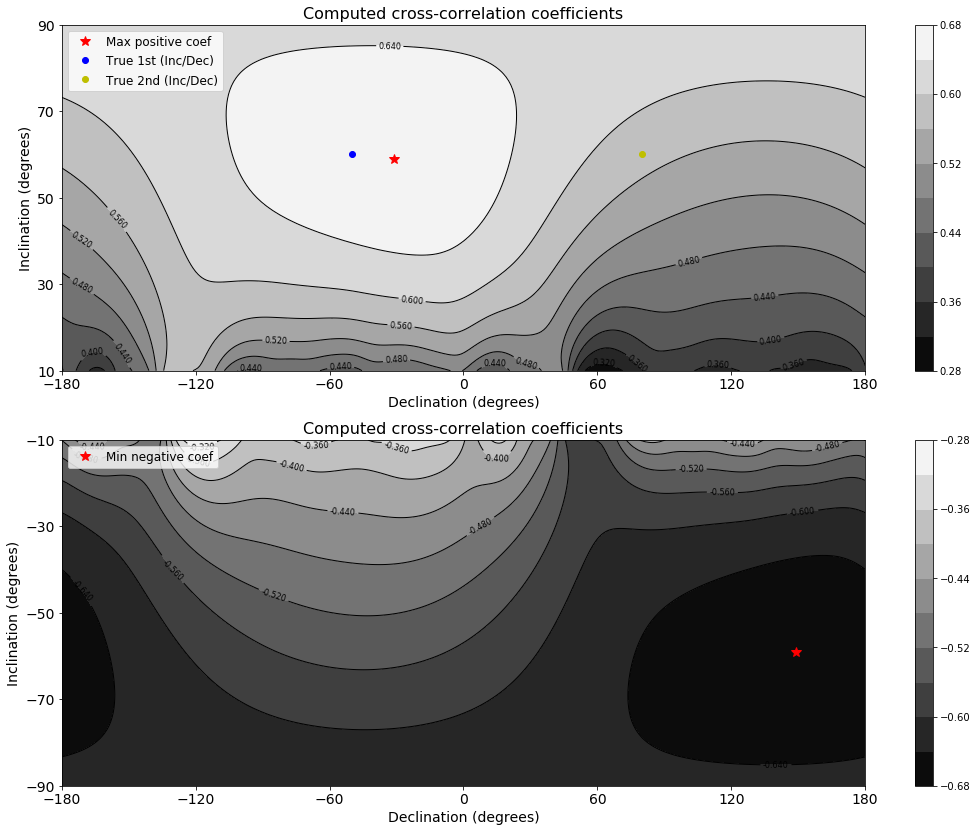

In [83]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.plot(dec1, inc2, 'bo', markersize = 6, label = 'True 1st (Inc/Dec)')
plt.plot(dec2, inc2, 'yo', markersize = 6, label = 'True 2nd (Inc/Dec)')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('test10-fig03-2nd_correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()